In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('C:/Users/gerald/Downloads/Car_sales.csv')

In [10]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [11]:
df.shape

(157, 16)

In [12]:
df.drop_duplicates(keep ='last')
df.shape

(157, 16)

In [14]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [115]:
manufacturer_counts = df.groupby('Manufacturer').size()

In [113]:
df['Manufacturer'].nunique()

30

# Which manufacturer offers the most variety when it comes to models?

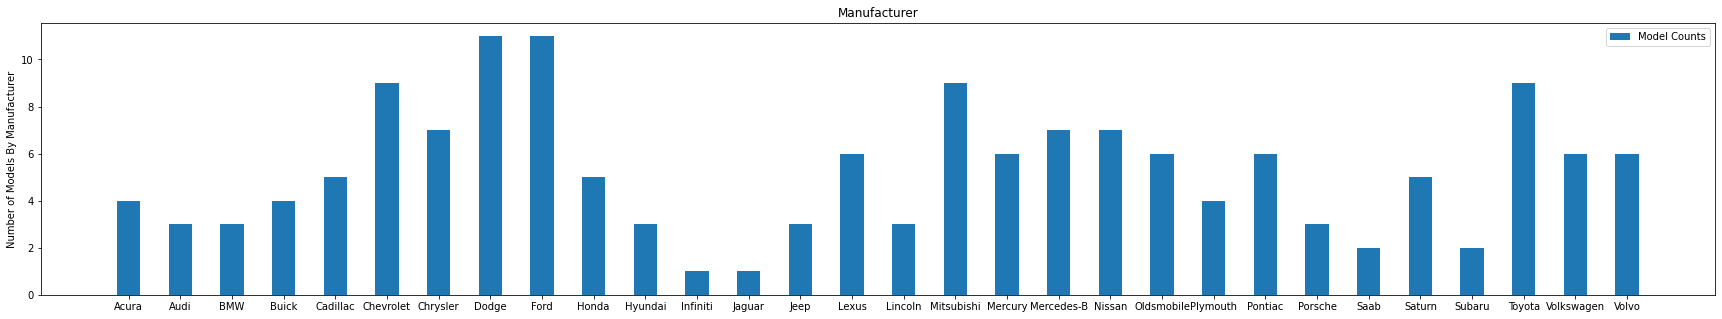

In [116]:
labels = df['Manufacturer'].unique()
manufact = manufacturer_counts

x = np.arange(len(labels))
width = 0.45

fig, ax = plt.subplots()
rects1 = ax.bar(x, manufact, width, label='Model Counts')

ax.set_ylabel('Number of Models By Manufacturer')
ax.set_title('Manufacturer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.set_figheight(5)
fig.set_figwidth(30)

plt.show()

# Which car has the highest fuel efficiency and which car has the lowest fuel efficiency? How about price?

In [22]:
def max_min_val(col):

    first = df[col].idxmax()
    first_obs = pd.DataFrame(df.loc[first])
    
    last = df[col].idxmin()
    last_obs = pd.DataFrame(df.loc[last])
    
    min_max_obs = pd.concat([first_obs, last_obs], axis=1)
    
    return min_max_obs 

In [24]:
max_min_val('Fuel_efficiency')

,26,18
Manufacturer,Chevrolet,Cadillac
Model,Metro,Escalade
Sales_in_thousands,21.855,14.785
__year_resale_value,5.16,NaN
Vehicle_type,Passenger,Car
Price_in_thousands,9.235,46.225
Engine_size,1,5.7
Horsepower,55,255
Wheelbase,93.1,117.5
Width,62.6,77


In [75]:
max_min_val('Price_in_thousands')

,99,26
Manufacturer,Mercedes-B,Chevrolet
Model,CL500,Metro
Sales_in_thousands,0.954,21.855
__year_resale_value,NaN,5.16
Vehicle_type,Passenger,Passenger
Price_in_thousands,85.5,9.235
Engine_size,5,1
Horsepower,302,55
Wheelbase,113.6,93.1
Width,73.1,62.6


# Are there any features correlated with price?

In [90]:
df_corr = df.corr()['Price_in_thousands']
df_corr.sort_values(ascending = False)

Price_in_thousands     1.000000
__year_resale_value    0.953840
Power_perf_factor      0.897945
Horsepower             0.839744
Engine_size            0.626875
Curb_weight            0.526224
Fuel_capacity          0.423282
Width                  0.329136
Length                 0.156935
Wheelbase              0.110513
Sales_in_thousands    -0.304734
Fuel_efficiency       -0.492157
Name: Price_in_thousands, dtype: float64

In [92]:
df[['Manufacturer','Model', 'Price_in_thousands', '__year_resale_value']]

,Manufacturer,Model,Price_in_thousands,__year_resale_value
0,Acura,Integra,21.50,16.360
1,Acura,TL,28.40,19.875
2,Acura,CL,NaN,18.225
3,Acura,RL,42.00,29.725
4,Audi,A4,23.99,22.255
...,...,...,...,...
152,Volvo,V40,24.40,NaN
153,Volvo,S70,27.50,NaN
154,Volvo,V70,28.80,NaN
155,Volvo,C70,45.50,NaN


In [104]:
df['Gross Resale'] = df['__year_resale_value'] - df['Price_in_thousands']  

In [105]:
grossresalebymanu = df[['Manufacturer','Model','Gross Resale']]

In [106]:
grossresalebymanu

,Manufacturer,Model,Gross Resale
0,Acura,Integra,-5.140
1,Acura,TL,-8.525
2,Acura,CL,NaN
3,Acura,RL,-12.275
4,Audi,A4,-1.735
...,...,...,...
152,Volvo,V40,NaN
153,Volvo,S70,NaN
154,Volvo,V70,NaN
155,Volvo,C70,NaN


# Which car and manufacturer has the best ROI after 1 year?

In [107]:
grossresalebymanu.groupby('Manufacturer').mean().sort_values(by = ['Gross Resale'], ascending = False)

,Gross Resale
Manufacturer,
Saturn,-2.310000
Volkswagen,-3.713000
BMW,-3.750000
Hyundai,-4.634000
Honda,-4.720000
Toyota,-5.277250
Jeep,-5.638333
Porsche,-5.998333
Plymouth,-5.998333


In [118]:
df[df['Manufacturer'] == 'Saturn']

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Gross Resale
129,Saturn,SL,80.620,9.20,Passenger,10.685,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,8/16/2012,39.986425,-1.485
130,Saturn,SC,24.546,10.59,Passenger,12.535,1.9,100.0,102.4,66.4,180.0,2.367,12.1,33.0,3/16/2011,40.700072,-1.945
131,Saturn,SW,5.223,10.79,Passenger,14.290,1.9,124.0,102.4,66.4,176.9,2.452,12.1,31.0,1/15/2011,49.865774,-3.500
132,Saturn,LW,8.472,NaN,Passenger,18.835,2.2,137.0,106.5,69.0,190.4,3.075,13.1,27.0,8/5/2011,56.295243,NaN
133,Saturn,LS,49.989,NaN,Passenger,15.010,2.2,137.0,106.5,69.0,190.4,2.910,13.1,28.0,12/4/2012,54.819728,NaN


### You should consider purchasing a Saturn SL for the best ROI and above average fuel efficiency at the cost of size and horsepower.

Issues with these assumptions:

 > Resale values should be examined on a model basis not by average for the manufacturer.
 > There are both price and resale rows with missing values that should be accounted for.
 > Many other variables go into purchasing a car and the resale value can be useless if you are spending more on gas or maintenence costs. 